In [ ]:
# вариант того, как моно кластеризовать TS. Плюсом данного подхода являетсято, 
# что нам не нужно знать сколько кластеров у нас должно быть. 
# считаем DTW и подаем в hdbscan


In [4]:
pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.2 MB/s eta 0:00:00


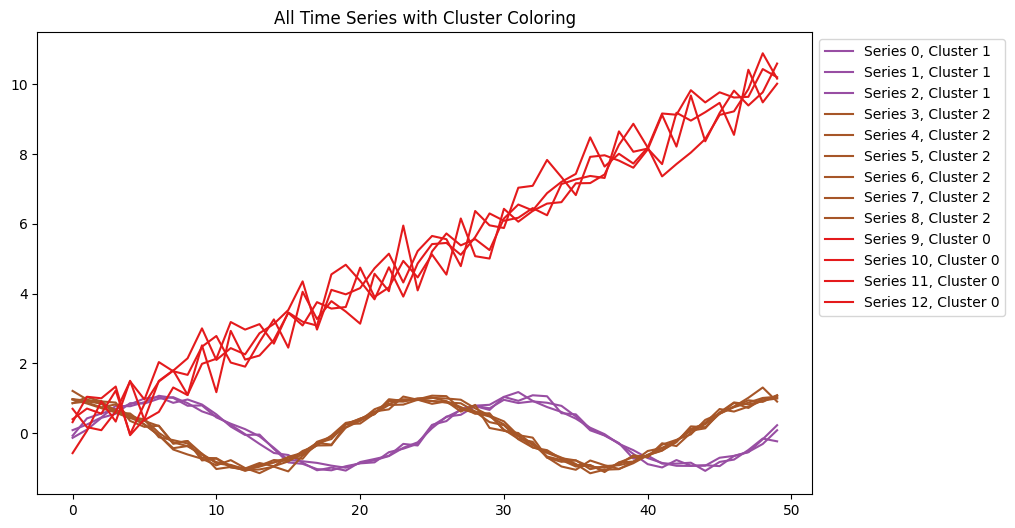

In [22]:
import numpy as np
import hdbscan
from tslearn.metrics import cdist_dtw
import matplotlib.pyplot as plt
from itertools import cycle

# Генерация синтетических временных рядов для нескольких кластеров
def generate_time_series(n_series_per_cluster=5, length=50):
    rng = np.random.default_rng()
    series = []

    # Кластер 1: синусоидальные волны
    for _ in range(3):
        base = np.sin(np.linspace(0, 4 * np.pi, length)) + rng.normal(0, 0.1, length)
        series.append(base)

    # Кластер 2: косинусоидальные волны
    for _ in range(6):
        base = np.cos(np.linspace(0, 4 * np.pi, length)) + rng.normal(0, 0.1, length)
        series.append(base)

    # Кластер 3: линейные тренды
    for _ in range(4):
        base = np.linspace(0, 10, length) + rng.normal(0, 0.5, length)
        series.append(base)

    return np.array(series)

# Генерируем по 5 временных рядов для каждого кластера (итого 15 рядов)
time_series = generate_time_series(5, 50)

# Рассчитываем матрицу расстояний DTW между временными рядами
distance_matrix = cdist_dtw(time_series)

# Применяем HDBSCAN для кластеризации на основе DTW расстояний
clusterer = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2)
labels = clusterer.fit_predict(distance_matrix)

# Визуализация всех временных рядов на одной картинке с цветом по кластерам
plt.figure(figsize=(10, 6))

# Определение цветовой палитры для кластеров
colors = cycle(plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels)))))

# Отображаем все временные ряды, подкрашенные по кластерам
for i, (series, label) in enumerate(zip(time_series, labels)):
    plt.plot(series, color=plt.cm.Set1(label / float(max(labels) + 1)), label=f'Series {i}, Cluster {label}')

plt.title('All Time Series with Cluster Coloring')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
